# DSCI6003 2.4 Lecture

## LDA and More on Dimensionality Reduction


### By the End of This Lecture You Will

1. Be familiar with the concepts of Linear Discriminant Analysis
2. Be able to perform LDA on a discrete dataset
3. Be able to recite the rules of thumb for dimensionality reduction


[Linear Discriminant Analysis (LDA)](http://scikit-learn.org/0.16/modules/lda_qda.html#lda-qda) is most commonly used as a pre-processing technique, although it has found a home in some fields as a means of classification. Like PCA it makes the assumption of normally distributed, independent data (less common). It also assumes completely separable classes (more common).

LDA approach is a discrete analog of Principal Component Analysis, but in addition to finding the component axes that maximize the variance of our data (PCA), we are interested in the axes that maximize the separation between classes (LDA).

Because LDA is class-based, we must have the labels a priori, making this an example of a supervised learner. It is called linear discriminant analysis due to the fact that the outputs, the "linear discriminants" are the **eigenvectors pointing along the boundaries of separation** between the classes. 

## The LDA Method

LDA is performed in almost exactly the same way as PCA:

1. Compute $\mu_{c}$, the mean feature vectors for each class $c$
2. Compute the scatter matrix $\Sigma_{W}$ and $\Sigma_{B}$ for between and within classes.
3. Solve the eigenvalue equation for $\Sigma_{W}^{-1}\Sigma_{B}$
4. Sort and select eigenvectors (linear discriminants)
5. Project the data onto the new space

## Interpreting Eigenvalues in PCA/LDA

The scree plot is often enough to determine if we have a clear dimensionality reduction. A looming danger with either method, however, occurs if noise in the data is oscillatory and of greater magnitude than the underlying signal. This is where skill and understanding of the data come in.

Below we'll perform an LDA by hand. The below code snippets are taken from [Sebastian Raschka's blog](http://sebastianraschka.com/Articles/2014_python_lda.html#step-3-solving-the-generalized-eigenvalue-problem-for-the-matrix-sw-1sb). The analysis is so adequate as to leave nothing to be desired.

In [5]:
feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal length in cm',
                  'sepal width in cm',
                  'petal length in cm',
                  'petal width in cm', ))}

In [6]:
import pandas as pd

df = pd.io.parsers.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',',
    )
df.columns = [l for i,l in sorted(feature_dict.items())] + ['class label']
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

df.tail()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
from sklearn.preprocessing import LabelEncoder

X = df[[0,1,2,3]].values
y = df['class label'].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

Once we have loaded the data, it's time to perform some basic eda to see how the classes are distributed.

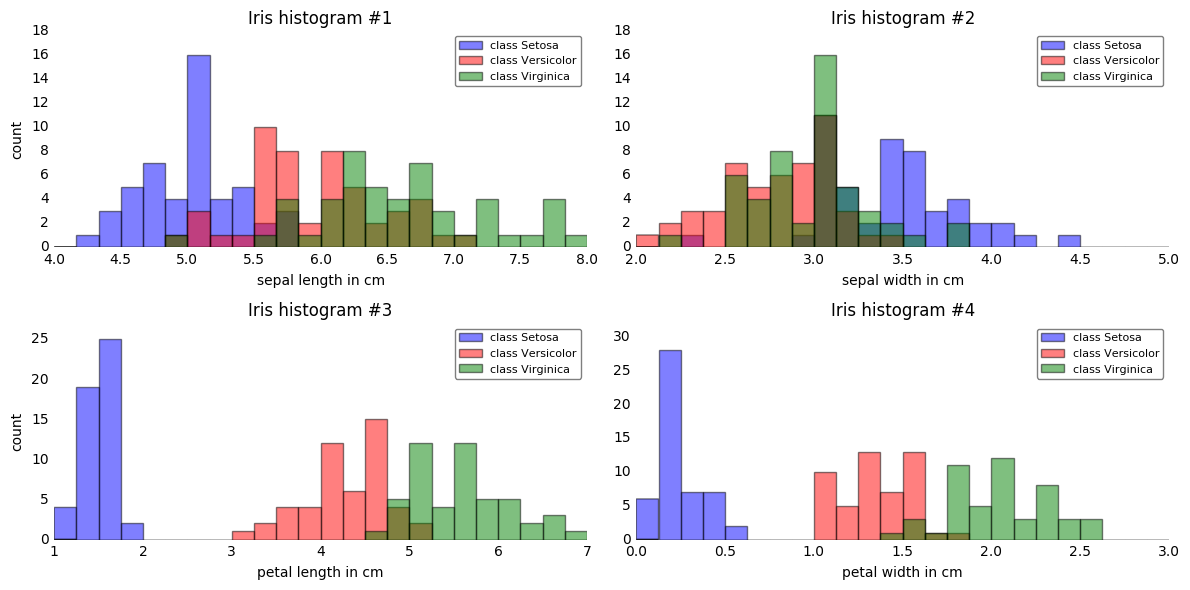

In [8]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import math

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

for ax,cnt in zip(axes.ravel(), range(4)):  

    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)

    # plottling the histograms
    for lab,col in zip(range(1,4), ('blue', 'red', 'green')):
        ax.hist(X[y==lab, cnt],
                   color=col,
                   label='class %s' %label_dict[lab],
                   bins=bins,
                   alpha=0.5,)
    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(feature_dict[cnt])
    ax.set_title('Iris histogram #%s' %str(cnt+1))

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')

fig.tight_layout()       

plt.show()

In [9]:
X[y==3]

array([[ 6.3,  3.3,  6. ,  2.5],
       [ 5.8,  2.7,  5.1,  1.9],
       [ 7.1,  3. ,  5.9,  2.1],
       [ 6.3,  2.9,  5.6,  1.8],
       [ 6.5,  3. ,  5.8,  2.2],
       [ 7.6,  3. ,  6.6,  2.1],
       [ 4.9,  2.5,  4.5,  1.7],
       [ 7.3,  2.9,  6.3,  1.8],
       [ 6.7,  2.5,  5.8,  1.8],
       [ 7.2,  3.6,  6.1,  2.5],
       [ 6.5,  3.2,  5.1,  2. ],
       [ 6.4,  2.7,  5.3,  1.9],
       [ 6.8,  3. ,  5.5,  2.1],
       [ 5.7,  2.5,  5. ,  2. ],
       [ 5.8,  2.8,  5.1,  2.4],
       [ 6.4,  3.2,  5.3,  2.3],
       [ 6.5,  3. ,  5.5,  1.8],
       [ 7.7,  3.8,  6.7,  2.2],
       [ 7.7,  2.6,  6.9,  2.3],
       [ 6. ,  2.2,  5. ,  1.5],
       [ 6.9,  3.2,  5.7,  2.3],
       [ 5.6,  2.8,  4.9,  2. ],
       [ 7.7,  2.8,  6.7,  2. ],
       [ 6.3,  2.7,  4.9,  1.8],
       [ 6.7,  3.3,  5.7,  2.1],
       [ 7.2,  3.2,  6. ,  1.8],
       [ 6.2,  2.8,  4.8,  1.8],
       [ 6.1,  3. ,  4.9,  1.8],
       [ 6.4,  2.8,  5.6,  2.1],
       [ 7.2,  3. ,  5.8,  1.6],
       [ 7

In [10]:
np.set_printoptions(precision=4)

mean_vectors = []
for cl in range(1,4):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 1: [ 5.006  3.418  1.464  0.244]

Mean Vector class 2: [ 5.936  2.77   4.26   1.326]

Mean Vector class 3: [ 6.588  2.974  5.552  2.026]



Now let's examine the scatter matrices


In [11]:
S_W = np.zeros((4,4))
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((4,4))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(4,1), mv.reshape(4,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[ 38.9562  13.683   24.614    5.6556]
 [ 13.683   17.035    8.12     4.9132]
 [ 24.614    8.12    27.22     6.2536]
 [  5.6556   4.9132   6.2536   6.1756]]


In [12]:
row = row.reshape(4,1)
mv = mv.reshape(4,1)

print (row-mv).dot((row-mv).T)


print S_W

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-12-e42c23d68fa3>, line 7)

In [ ]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) # make column vector
    overall_mean = overall_mean.reshape(4,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

In [ ]:
mean_vec - overall_mean

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])


In [ ]:
from matplotlib import pyplot as plt

W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)
X_lda = X.dot(W)

def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()

## LDA as a Classifier using Sklearn

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Create an instance of the class
lda = LinearDiscriminantAnalysis(n_components = 2)

In [ ]:
#1 Split data into train/test
#code from http://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas
X=dummies.drop(['flag_student','G1','G2'],axis = 1)
X_scaled = (X-mean(X, axis = 0))/(var(X, axis =0))
Y=dummies.flag_student
msk = np.random.rand(len(dummies)) < 0.8
train_X,train_Y = X_scaled[msk],Y[msk]
test_X, test_Y = X_scaled[~msk],Y[~msk]
len(test_Y),len(train_Y)

In [ ]:
# Run a train test split on the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [ ]:
# Fit the model to the training data
lda.fit(X_train,y_train)

# Print the accuracy score for the training set
print "Accuracy Score Training Set: {}".format(accuracy_score(y_train,lda.predict(X_train)))

# Print the accuracy score for the testing set
print "Accuracy Score Test Set: {}".format(accuracy_score(y_test,lda.predict(X_test)))

### To use it in dimensionality reduction, just set n_components to whatever value you like and run the training data through fit transform and the testing data through transform, like so. 

In [ ]:
reduced_X_train = lda.fit_transform(X_train,y_train)
reduced_X_test = lda.transform(X_test)

In [ ]:
# Notice now how there are only two components

reduced_X_train